     name  age sex  height  weight
0    KATE   12   女     145    43.1
1  LOUISE   12   女     149    55.8
2    JANE   12   女     135    33.6
3  JACLYN   12   女     162    65.8
4  LILLIE   12   女     127    29.1


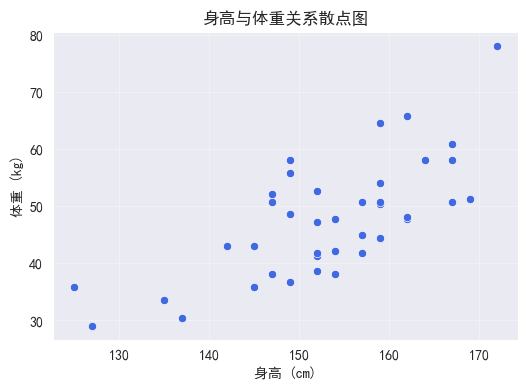

身高 体重的皮尔逊相关系数 0.7084378460075293
                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     38.29
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           3.15e-07
Time:                        20:21:20   Log-Likelihood:                -134.71
No. Observations:                  40   AIC:                             273.4
Df Residuals:                      38   BIC:                             276.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.74

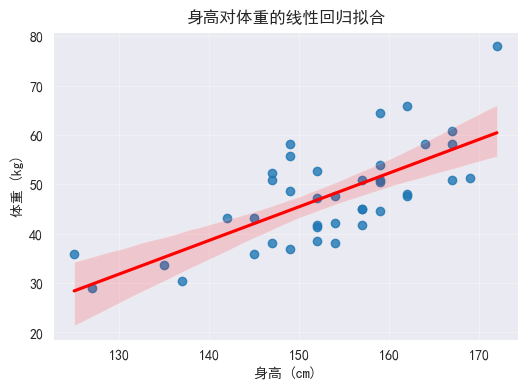

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 导入处理图标
df = pd.read_excel('数据1.xlsx', header=0, skiprows=[1, 2])
print(df.head())

height_col = 'height'
weight_col = 'weight'

plt.figure(figsize=(6, 4))
sns.scatterplot(x=height_col, y=weight_col, data=df, color='royalblue')
plt.title('身高与体重关系散点图')
plt.xlabel('身高 (cm)')
plt.ylabel('体重 (kg)')
plt.grid(alpha=0.3)
plt.show()

corr = df[height_col].corr(df[weight_col])
print(f"身高 体重的皮尔逊相关系数", corr)

# 回归模型
x = sm.add_constant(df[height_col])
y = df[weight_col]

model = sm.OLS(y, x).fit()
print(model.summary())

plt.figure(figsize=(6, 4))
sns.regplot(x=height_col, y=weight_col, data=df, line_kws={'color': 'red'})
plt.title('身高对体重的线性回归拟合')
plt.xlabel('身高 (cm)')
plt.ylabel('体重 (kg)')
plt.grid(alpha=0.3)
plt.show()

回归方程：体重 = -56.75 + 0.68 * 身高

***********************************************************************************

   age   weight  oxygen  runtime  rstpulse  runpulse  maxpulse
0    44   89.47  44.609    11.37        62       178       182
1    40   75.07  45.313    10.07        62       185       185
2    44   85.84  54.297     8.65        45       156       168
3    42   68.15  59.571     8.17        40       166       172
4    38   89.02  49.874     9.22        55       178       180
['age ', 'weight', 'oxygen', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']


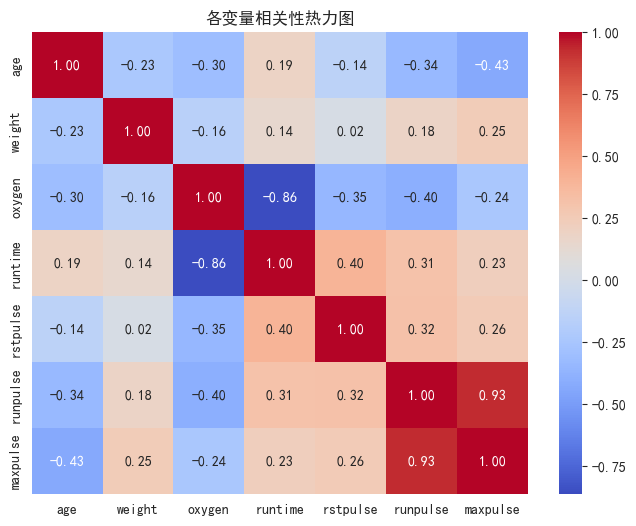

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.781   
Dependent Variable: oxygen           AIC:                150.0062
Date:               2025-10-20 20:21 BIC:                158.6101
No. Observations:   31               Log-Likelihood:     -69.003 
Df Model:           5                F-statistic:        22.34   
Df Residuals:       25               Prob (F-statistic): 1.74e-08
R-squared:          0.817            Scale:              6.2280  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept    82.2022    9.1666   8.9675  0.0000  63.3232  101.0813
weight       -0.0501    0.0577  -0.8672  0.3941  -0.1690    0.0689
runtime      -2.9767    0.3762  -7.9122  0.0000  -3.7516   -2.2019
rstpulse      0.0257    0.0617   0.4172  0.6801  -0.1013    0.1527
runpulse     -0.4016

In [2]:
df = pd.read_excel('数据2.xlsx', header=0)
print(df.head())
print(df.columns.tolist())
df.columns = df.columns.str.strip()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("各变量相关性热力图")
plt.show()

#x = df[['age', 'weight', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']]
#y = df['oxygen']

# 添加常数项
#x = sm.add_constant(x)

import statsmodels.formula.api as smf
formula='oxygen ~ weight + runtime + rstpulse + runpulse + maxpulse'
model = smf.ols(formula, data=df).fit()
print(model.summary2())


去除p>0.05的变量

In [3]:
formula='oxygen ~ runtime - rstpulse + runpulse + maxpulse - weight'
model = smf.ols(formula, data=df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.789   
Dependent Variable: oxygen           AIC:                147.1925
Date:               2025-10-20 20:21 BIC:                152.9284
No. Observations:   31               Log-Likelihood:     -69.596 
Df Model:           3                F-statistic:        38.37   
Df Residuals:       27               Prob (F-statistic): 7.09e-10
R-squared:          0.810            Scale:              5.9916  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     80.9008    8.8162   9.1764  0.0000  62.8115  98.9901
runtime       -2.9702    0.3453  -8.6006  0.0000  -3.6788  -2.2616
runpulse      -0.3751    0.1236  -3.0337  0.0053  -0.6288  -0.1214
maxpulse       0.3542    0.1348   2.6270  0.0140   0.0775   0.6309
--------------------

回归模型 = 80.90 - 2.97 * runtime - 0.38 * runpulse + 0.35 * maxpulse
*******************************************************************

原始数据：
    x     y
0  20  0.57
1  30  0.72
2  40  0.81
3  50  0.87
4  60  0.91

拟合参数：b0 = 0.9962, b1 = 0.0420
模型拟合优度 R² = 0.9976


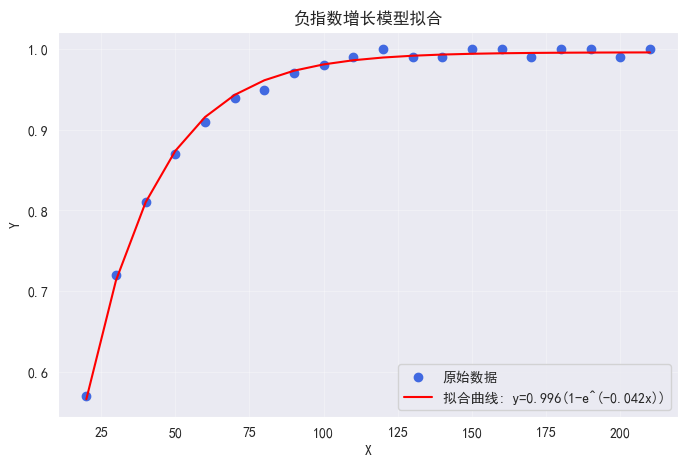

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('数据3.txt', sep='\\s+', header=0)
print("原始数据：")
print(df.head())

x = df['x']
y = df['y']

# 负指数增长函数
def neg_exp(x, b0, b1):
    return b0 * (1 - np.exp(-b1 * x))

initial_guess = [1.0, 0.01]  # 初始参数猜测
params, cov = curve_fit(neg_exp, x, y, p0=initial_guess)

b0, b1 = params
print(f"\n拟合参数：b0 = {b0:.4f}, b1 = {b1:.4f}")

y_pred = neg_exp(x, *params)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"模型拟合优度 R² = {r2:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(x, y, label='原始数据', color='royalblue')
plt.plot(x, y_pred, color='red', label=f'拟合曲线: y={b0:.3f}(1-e^(-{b1:.3f}x))')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("负指数增长模型拟合")
plt.legend()
plt.grid(alpha=0.3)
plt.show()